# CPMP Demo
A proof of concept of using CPMP-Tools Datasets in Python for data analysis.

Make sure you run all of the code snippets in order or else you might get an error!

## Prerequisites

Here we will install a few libraries for data analysis in Python.

In [ ]:
!apt-get install -qq python3-matplotlib python3-pandas python3-seaborn

Extracting templates from packages: 100%
Selecting previously unselected package fonts-lyx.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../00-fonts-lyx_2.2.4-0ubuntu0.18.04.1_all.deb ...
Unpacking fonts-lyx (2.2.4-0ubuntu0.18.04.1) ...
Selecting previously unselected package javascript-common.
Preparing to unpack .../01-javascript-common_11_all.deb ...
Unpacking javascript-common (11) ...
Selecting previously unselected package libblosc1.
Preparing to unpack .../02-libblosc1_1.14.2+ds1-1_amd64.deb ...
Unpacking libblosc1 (1.14.2+ds1-1) ...
Selecting previously unselected package libjs-jquery.
Preparing to unpack .../03-libjs-jquery_3.2.1-1_all.deb ...
Unpacking libjs-jquery (3.2.1-1) ...
Selecting previously unselected package libjs-jquery-ui.
Preparing to unpack .../04-libjs-jquery-ui_1.12.1+dfsg-5_all.deb ...
Unpacking libjs-jquery-ui (1.12.1+dfsg-5) ...
Selecting previously unselected package ttf-bitstream-vera.
Preparing to unpack .

## Imports

We need to import Pandas (`pd`) and the Pyplot module (`plt`) from matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Box and Whisker Examples

Here we will create some box and whisker plots from the Major City Populations dataset.

See: [matplotlib.pyplot.boxplot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.boxplot.html)

In [ ]:
# Read the CSV (TSV) file and print it out.
# df stands for "DataFrame" a type of object in pandas.
df = pd.read_csv('https://github.com/bmsa-cs/cpmp-datasets/raw/main/tsv/MajorCityPopulations.tsv', delimiter='\t')

#Print out the dataframe
print(df)

           U.S. City  2000 (in 1,000s)  2010 (in 1,000s)
0        Atlanta, GA               416               420
1         Aurora, CO               276               325
2       Berkeley, CA               103               113
3          Boise, ID               186               206
4        El Paso, TX               564               649
5       Hartford, CT               122               125
6   Independence, MO               113               117
7      Milwaukee, WI               597               595
8         Newark, NJ               274               277
9      Portland, OR                529               584
10     St. Louis, MO               348               319
11  Washington, D.C.               572               602


We're going to use the 2000 and 2010 column to create and label boxplots.



In [ ]:
# These are the column headings
print(df.keys())

Index(['U.S. City', '2000 (in 1,000s)', '2010 (in 1,000s)'], dtype='object')


We're going to create boxplots out of both columns of data:
`'2000 (in 1,000s)'` and `'2010 (in 1,000s)'`

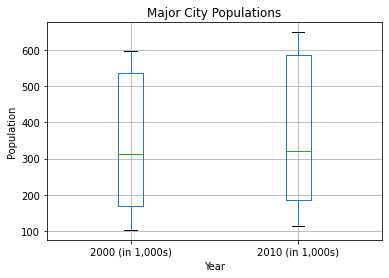

In [ ]:
# We want to create box plots in separate columns out of both the 2000 and 2010 populations.
data = [df['2000 (in 1,000s)'], df['2010 (in 1,000s)']]

# Create the boxplot from the dataframe and store it in ax. (axes subplot)
ax = df.boxplot(column=['2000 (in 1,000s)','2010 (in 1,000s)'],grid=True)

# Label the box plot
ax.set_title("Major City Populations")
ax.set_xlabel("Year")
ax.set_ylabel("Population")

# plt.tight_layout()
plt.show()

## Maximums and Minimums

Pandas allows us to quickly calculate the minimums and maximums of a DataFrame.

In [ ]:
#numeric_only = True hides str values. (eg. first/last city in the alphabet.)
min = df.min(numeric_only=True)
max = df.max(numeric_only=True)

print("Min Population:")
print(min)
print("Max Population:")
print(max)

Min Population:
2000 (in 1,000s)    103
2010 (in 1,000s)    113
dtype: int64
Max Population:
2000 (in 1,000s)    597
2010 (in 1,000s)    649
dtype: int64


## Measures of central tendency

Pandas makes it really easy to calculate measures of central tendency (mean, median, and mode) on a DataFrame object.


In [ ]:
print("Mean:")
print(df.mean())
print("Median:")
print(df.median())
print("Mode:")
print(df.mode(numeric_only=True))

Mean:
2000 (in 1,000s)    341.666667
2010 (in 1,000s)    361.000000
dtype: float64
Median:
2000 (in 1,000s)    312.0
2010 (in 1,000s)    322.0
dtype: float64
Mode:
    2000 (in 1,000s)  2010 (in 1,000s)
0                103               113
1                113               117
2                122               125
3                186               206
4                274               277
5                276               319
6                348               325
7                416               420
8                529               584
9                564               595
10               572               602
11               597               649


Looks like mode wasn't very useful in a dataset with all different populations.

## Standard Deviation

We can also calculate the standard deviation of a DataFrame with `.std()`

In [ ]:
std = df.std()
print(f"Std. Deviation:\n{std}")

Std. Deviation:
2000 (in 1,000s)    190.446047
2010 (in 1,000s)    204.465601
dtype: float64


## Histograms and Distributions

`seaborn` is a package that extends on `matplotlib` to add additional visualization options, including KDE curves.

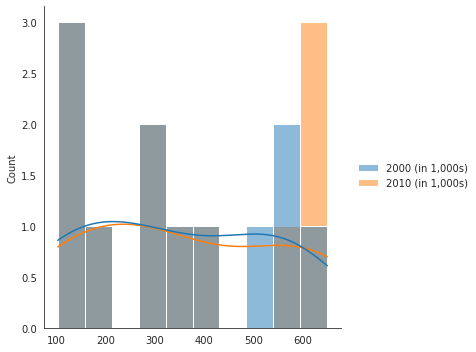

In [ ]:
# https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
import seaborn as sns
sns.set_style('white')
#kde=True enables the distribution curve, not very useful with this dataset.
sns.displot(data, bins=10, kde=True)
plt.yscale("linear")
plt.show()

## Random
